In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_classification
x_data_generated, y_data_generated = make_classification(scale=1, random_state=1)

In [3]:
y_data_generated = y_data_generated.reshape(100,1)
x_data_generated.shape, y_data_generated.shape

((100, 20), (100, 1))

In [4]:
df = np.hstack((x_data_generated, y_data_generated))
df.shape

(100, 21)

In [5]:
df = pd.DataFrame(df)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.606548,0.816958,1.051321,1.657125,-0.459718,-0.588964,0.650323,0.050317,1.705484,1.417674,...,0.309817,0.778174,-1.124787,-1.283933,0.080751,0.094996,-0.364538,0.164665,-0.767804,1.0
1,-3.053764,0.921162,-1.458324,0.240506,0.612233,-0.513571,-0.192004,0.398598,0.744885,-0.999427,...,-0.961264,0.578464,-1.070208,-1.287740,-1.494194,0.494342,0.204377,-1.552699,-0.446699,1.0
2,0.606404,0.680645,1.021248,1.495885,0.672620,-0.693833,-1.470237,0.599213,2.428877,0.675454,...,-0.214654,-1.019520,-1.204402,-1.285590,-0.477124,0.524750,1.037039,-0.830011,-0.035990,1.0
3,1.616950,-1.515948,2.449369,0.623362,0.242669,-0.512259,0.129102,1.407540,0.201830,-0.434957,...,-1.219744,0.109403,-0.024881,0.676609,-0.198838,-0.545774,-0.203394,1.558806,-0.700399,0.0
4,-0.828148,-1.569173,1.762609,-1.223880,1.127751,-0.921486,-0.447308,-0.982161,0.050293,0.558264,...,0.680979,-0.474590,-0.540548,0.284574,0.522655,-0.357514,0.098942,-0.429386,-0.355413,0.0


In [6]:
y = df[20]
X = df.copy()
del X[20]

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
print(all_features := cross_val_score(LogisticRegression(), X, y, scoring='accuracy').mean())
print(len_0 := len(X.columns))

0.9
20


## Выбор признаков на основе матрицы корреляции

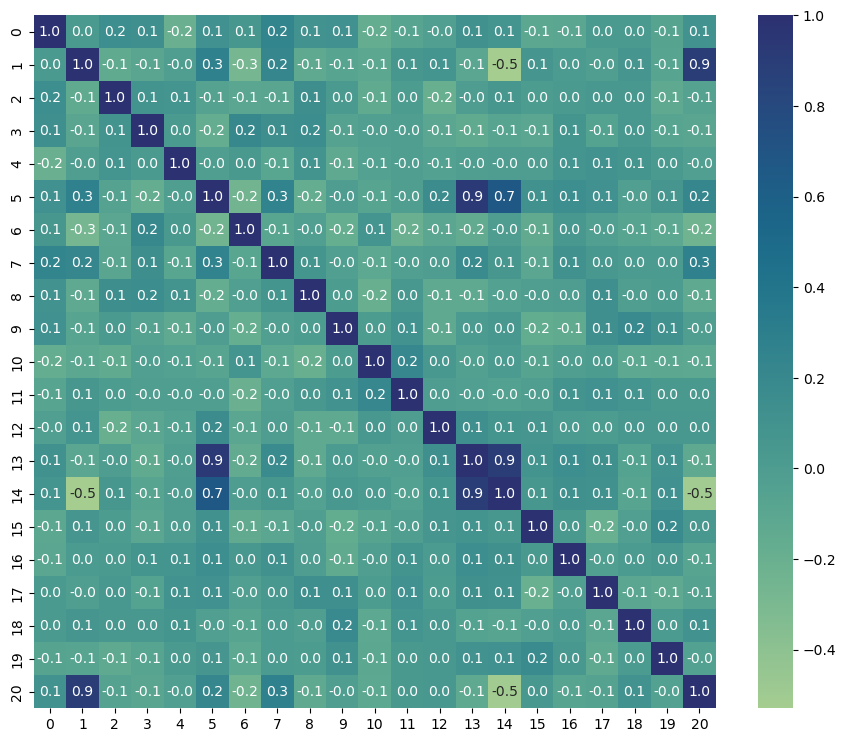

In [8]:
fig = plt.figure(figsize=(11,9))
sns.heatmap(df.corr(), annot=True, fmt=".1f", cmap="crest")
plt.show()

Проанализируем таблицу корреляций.

Удалим признаки, имеющие нулевую корреляцию с целевым признаком. features_to_delete = [4,9,11,12,15,19]

Признак 13 имеет высокую корреляцию с признаками 14, 5. Удалим его. features_to_delete = [4,9,11,12,15,19,13]

Проверим метрики на оставшихся признаках.

In [9]:
features_to_delete = [4,9,11,12,15,19,13]
X = df[(df.columns.difference(features_to_delete))]
print(corr_table_features:=cross_val_score(LogisticRegression(), X, y, scoring='accuracy').mean())
print(len_1 := len(X.columns))

0.96
14


Точность модели после удаления признаков на основе таблицы корреляции улучшилась с 0.90 до 0.96.

## Отсечение низковариативных признаков VarianceThreshold

In [10]:
X = df.copy()
del X[20]

In [11]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold()
s = selector.fit_transform(X)
pd.DataFrame(s)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.606548,0.816958,1.051321,1.657125,-0.459718,-0.588964,0.650323,0.050317,1.705484,1.417674,-0.737290,0.309817,0.778174,-1.124787,-1.283933,0.080751,0.094996,-0.364538,0.164665,-0.767804
1,-3.053764,0.921162,-1.458324,0.240506,0.612233,-0.513571,-0.192004,0.398598,0.744885,-0.999427,0.479852,-0.961264,0.578464,-1.070208,-1.287740,-1.494194,0.494342,0.204377,-1.552699,-0.446699
2,0.606404,0.680645,1.021248,1.495885,0.672620,-0.693833,-1.470237,0.599213,2.428877,0.675454,2.293718,-0.214654,-1.019520,-1.204402,-1.285590,-0.477124,0.524750,1.037039,-0.830011,-0.035990
3,1.616950,-1.515948,2.449369,0.623362,0.242669,-0.512259,0.129102,1.407540,0.201830,-0.434957,0.502741,-1.219744,0.109403,-0.024881,0.676609,-0.198838,-0.545774,-0.203394,1.558806,-0.700399
4,-0.828148,-1.569173,1.762609,-1.223880,1.127751,-0.921486,-0.447308,-0.982161,0.050293,0.558264,-0.110728,0.680979,-0.474590,-0.540548,0.284574,0.522655,-0.357514,0.098942,-0.429386,-0.355413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.017818,0.752217,0.112368,-1.067877,0.394428,-0.584312,0.457947,0.572963,0.725523,-0.076679,-0.600139,-0.036818,0.571805,-1.090944,-1.226844,0.915499,-0.150504,0.185536,0.146765,-0.438200
96,1.829906,0.709932,0.759494,0.590494,-0.449346,0.755597,-1.136433,-0.952084,1.085251,1.077377,-1.425156,-1.102970,0.439127,0.690209,0.231198,-1.089551,-1.103216,0.834283,0.715333,-1.389550
97,-2.308039,-1.423689,1.142564,0.459782,-0.120889,-0.165523,0.428659,0.021172,-0.260561,-0.206331,0.327068,-0.691269,1.797919,0.391846,0.970792,0.814625,-2.514925,-0.247016,-0.379120,0.276103
98,-1.537029,2.149570,0.324554,-0.349094,0.988578,0.462844,0.121255,-0.889331,-0.242826,0.239045,0.503906,2.113824,0.913951,-0.311463,-1.239471,0.514865,0.505363,2.153233,1.319726,-0.879730


Признаков с дисперсией равной 0 не было найдено. Повысим планку отсечения признаков, до значения дисперсии равной P.

Подберем значение P исходя из значений дисперсии по всем признакам.

In [12]:
X.var() # выберем пороговое значение дисперсии равное 1

0     1.695661
1     1.079125
2     1.327927
3     0.779257
4     0.962390
5     0.809993
6     0.908940
7     1.085308
8     0.982029
9     0.952063
10    1.162269
11    0.997204
12    1.059371
13    1.310484
14    1.174718
15    0.906332
16    0.973134
17    0.895022
18    1.014235
19    0.934936
dtype: float64

In [13]:
P = 1
selector = VarianceThreshold(threshold=P)
s = selector.fit_transform(X)
X = pd.DataFrame(s)
X.head()

,0,1,2,3,4,5,6,7,8
0,0.606548,0.816958,1.051321,0.050317,-0.737290,0.778174,-1.124787,-1.283933,0.164665
1,-3.053764,0.921162,-1.458324,0.398598,0.479852,0.578464,-1.070208,-1.287740,-1.552699
2,0.606404,0.680645,1.021248,0.599213,2.293718,-1.019520,-1.204402,-1.285590,-0.830011
3,1.616950,-1.515948,2.449369,1.407540,0.502741,0.109403,-0.024881,0.676609,1.558806
4,-0.828148,-1.569173,1.762609,-0.982161,-0.110728,-0.474590,-0.540548,0.284574,-0.429386


Осталось 9 признаков.

In [14]:
print(VarianceThreshold_features:=cross_val_score(LogisticRegression(), X, y, scoring='accuracy').mean())
print(len_2 := len(X.columns))

0.9400000000000001
9


Точность модели после удаления низковариативных признаков улучшилась с 0.90 до 0.94.

## SelectKBest

In [15]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [16]:
X = df.copy()
del X[20]

In [17]:
selector = SelectKBest(f_classif, k=5).fit(X,y)
print(f'Список лучших признаков: {", ".join(selector.get_feature_names_out())}')
X = pd.DataFrame(selector.transform(X))
X.head()

Список лучших признаков: x1, x5, x6, x7, x14


,0,1,2,3,4
0,0.816958,-0.588964,0.650323,0.050317,-1.283933
1,0.921162,-0.513571,-0.192004,0.398598,-1.287740
2,0.680645,-0.693833,-1.470237,0.599213,-1.285590
3,-1.515948,-0.512259,0.129102,1.407540,0.676609
4,-1.569173,-0.921486,-0.447308,-0.982161,0.284574


In [18]:
print(SelectKBest_features:=cross_val_score(LogisticRegression(), X, y, scoring='accuracy').mean())
print(len_3 := len(X.columns))

0.96
5


Точность модели улучшилась с 0.90 до 0.96.

## SelectFromModel

In [19]:
from sklearn.feature_selection import SelectFromModel
X = df.copy()
del X[20]

In [20]:
selector = SelectFromModel(estimator=LogisticRegression(penalty='l1', solver='liblinear')).fit(X, y)

In [21]:
np.mean(selector.estimator_.coef_[0])

0.2529715156515596

In [22]:
selector.threshold_

1e-05

In [23]:
selector.get_support()

array([ True,  True, False, False, False, False, False,  True,  True,
        True, False, False, False, False,  True, False,  True, False,
        True, False])

In [24]:
print(f'Список лучших признаков: {", ".join(selector.get_feature_names_out())}')

Список лучших признаков: x0, x1, x7, x8, x9, x14, x16, x18


In [25]:
X = pd.DataFrame(selector.transform(X))
X.head()

,0,1,2,3,4,5,6,7
0,0.606548,0.816958,0.050317,1.705484,1.417674,-1.283933,0.094996,0.164665
1,-3.053764,0.921162,0.398598,0.744885,-0.999427,-1.287740,0.494342,-1.552699
2,0.606404,0.680645,0.599213,2.428877,0.675454,-1.285590,0.524750,-0.830011
3,1.616950,-1.515948,1.407540,0.201830,-0.434957,0.676609,-0.545774,1.558806
4,-0.828148,-1.569173,-0.982161,0.050293,0.558264,0.284574,-0.357514,-0.429386


In [26]:
print(SelectFromModel_features:=cross_val_score(LogisticRegression(), X, y, scoring='accuracy').mean())
print(len_4 := len(X.columns))

0.95
8


Точность модели улучшилась с 0.90 до 0.95.

## RandomForestClassifier & feature_impotance

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
X = df.copy()
del X[20]

clf = RandomForestClassifier(max_depth=2, random_state=13)
clf.fit(X,y)

RandomForestClassifier(max_depth=2, random_state=13)

In [29]:
imp = pd.Series(clf.feature_importances_)
imp.index = list(map(str, list(imp.index)))

In [30]:
imp.sort_values(ascending=False)

1     0.324561
14    0.153201
5     0.144472
7     0.064237
13    0.049432
6     0.039865
11    0.027866
16    0.027219
8     0.021397
3     0.019644
19    0.019521
12    0.017162
17    0.016397
4     0.015293
2     0.013598
0     0.013350
9     0.013200
18    0.010370
10    0.007131
15    0.002085
dtype: float64

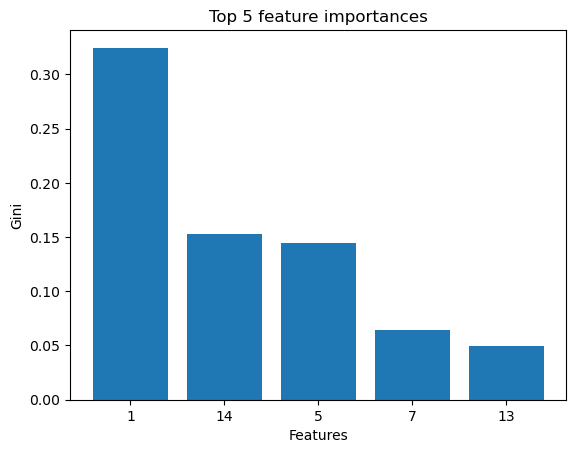

In [31]:
plt.title('Top 5 feature importances')
plt.xlabel('Features')
plt.ylabel('Gini')
plt.bar(imp.sort_values(ascending=False).index[0:5], imp.sort_values(ascending=False)[0:5])
plt.show()

In [32]:
indexes = list(map(int, imp.sort_values(ascending=False).index[0:5]))
X = X[indexes]
X.head()

,1,14,5,7,13
0,0.816958,-1.283933,-0.588964,0.050317,-1.124787
1,0.921162,-1.287740,-0.513571,0.398598,-1.070208
2,0.680645,-1.285590,-0.693833,0.599213,-1.204402
3,-1.515948,0.676609,-0.512259,1.407540,-0.024881
4,-1.569173,0.284574,-0.921486,-0.982161,-0.540548


In [33]:
print(R_Forest_importances_features:=cross_val_score(LogisticRegression(), X, y, scoring='accuracy').mean())
print(len_5 := len(X.columns))

0.96
5


Точность модели улучшилась с 0.90 до 0.96.

### SequentialFeatureSelector

In [34]:
from sklearn.feature_selection import SequentialFeatureSelector

In [35]:
X = df.copy()
del X[20]

In [36]:
sfs = SequentialFeatureSelector(LogisticRegression(), n_features_to_select=3)

In [37]:
sfs.fit(X,y)

SequentialFeatureSelector(estimator=LogisticRegression(),
                          n_features_to_select=3)

In [38]:
sfs.get_support()

array([ True,  True, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [39]:
X = pd.DataFrame(sfs.transform(X))
X.head()

,0,1,2
0,0.606548,0.816958,1.657125
1,-3.053764,0.921162,0.240506
2,0.606404,0.680645,1.495885
3,1.616950,-1.515948,0.623362
4,-0.828148,-1.569173,-1.223880


In [40]:
print(SequentialFeatureSelector_features:=cross_val_score(LogisticRegression(), X, y, scoring='accuracy').mean())
print(len_6 := len(X.columns))

0.96
3


Точность модели улучшилась с 0.90 до 0.96.

## Выводы:

In [41]:
pivot_table = {
'all_features': [all_features, len_0],
'corr_table_features': [corr_table_features, len_1],
'VarianceThreshold_features': [VarianceThreshold_features, len_2],
'SelectKBest_features': [SelectKBest_features, len_3],
'SelectFromModel_features': [SelectFromModel_features, len_4],
'R_Forest_importances_features': [R_Forest_importances_features, len_5],
'SequentialFeatureSelector_features': [SequentialFeatureSelector_features, len_6]
}

In [42]:
pivot_table = pd.DataFrame(pivot_table).transpose()
pivot_table.columns = ['average accuracy', 'number of features']

In [43]:
pivot_table

,average accuracy,number of features
all_features,0.90,20.0
corr_table_features,0.96,14.0
VarianceThreshold_features,0.94,9.0
SelectKBest_features,0.96,5.0
SelectFromModel_features,0.95,8.0
R_Forest_importances_features,0.96,5.0
SequentialFeatureSelector_features,0.96,3.0


Выявленные недостатки моделей:

Таблица корреляции: ручной поиск корреляций между признками;

VarianceThreshold: необходимость подбора значения дисперсии (threshold).